In [207]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

tour idx: 4
[[5 4 5 3]
 [2 5 4 1]
 [3 6 8 6]
 [7 6 1 3]
 [4 5 6 5]
 [5 7 7 4]
 [7 4 3 1]
 [0 2 8 0]
 [4 8 2 7]
 [4 5 4 3]
 [1 1 7 3]
 [8 0 6 7]
 [1 7 5 2]
 [4 7 8 3]
 [6 0 6 8]
 [4 3 7 1]
 [3 4 4 6]
 [3 8 2 3]
 [8 6 1 2]
 [6 5 1 3]
 [1 7 1 5]
 [4 2 1 5]
 [7 6 6 0]
 [8 4 4 4]
 [8 0 0 7]
 [7 3 2 0]
 [1 0 0 7]
 [5 2 1 3]
 [4 6 5 7]
 [0 8 5 1]
 [3 7 2 4]
 [8 3 4 5]
 [7 0 1 1]
 [3 1 6 5]
 [7 7 1 4]
 [3 1 3 3]
 [6 8 1 1]
 [3 7 0 1]
 [6 7 6 3]
 [3 1 1 5]
 [3 4 7 7]
 [7 1 5 1]
 [5 7 3 0]
 [5 3 6 3]
 [2 1 8 8]
 [1 3 8 6]
 [5 1 6 5]
 [0 3 7 6]
 [3 4 6 0]
 [4 4 5 4]
 [8 1 1 4]
 [3 7 6 2]
 [6 0 3 1]
 [7 2 0 6]
 [8 2 0 6]
 [0 6 6 2]
 [6 1 2 5]
 [8 1 4 1]
 [3 1 1 2]
 [5 1 4 5]
 [0 8 5 5]
 [7 2 2 2]
 [3 3 4 5]
 [4 3 1 4]]
0
dec creator: [5453, 2541, 3686, 7613, 4565, 5774, 7431, 280, 4827, 4543, 1173, 8067, 1752, 4783, 6068, 4371, 3446, 3823, 8612, 6513, 1715, 4215, 7660, 8444, 8007, 7320, 1007, 5213, 4657, 851, 3724, 8345, 7011, 3165, 7714, 3133, 6811, 3701, 6763, 3115, 3477, 7151, 5730, 5363, 2188,

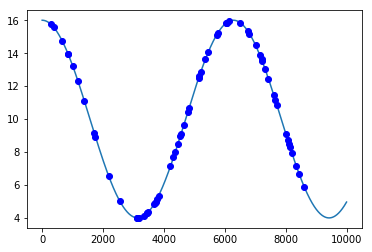

In [208]:
seq_len = 4
dec_range = 4
xrangefunc = 10000
pop_size = 64
dyn_range = 9
no_tournaments = 4
mutation_rate = 0.1
#tournament_size = 2
#goal = np.random.randint(dyn_range, size=seq_len) #random goal
#goal = np.zeros(seq_len,dtype=int) #goals of one
#goal = np.arange(seq_len);

x = np.arange(xrangefunc)
goal = 0
goal_func_plot = goal_func(x)

pop = np.random.randint(dyn_range,size=(pop_size,seq_len))
tournament_idx = tournamentCreator(pop)
print("tour idx: " + str(len(tournament_idx)))
dec_table = dec_creator(pop) 
try1 = np.apply_along_axis(goal_func,0,dec_table)

print(pop)
print(goal)

print("dec creator: " + str(dec_table))
print("y " +str(try1))

plt.plot(goal_func_plot)
print(try1)
plt.plot(dec_table,try1,'bo')



In [209]:
def goal_func(x):
    #y = np.multiply(np.power(x-8000,2),5)
    y = np.add(6*np.cos(x*0.001),10)
    return y

In [210]:
def tournamentCreator(pop):
    perm_idx = np.random.permutation(len(pop)) #produce a permuted index of our array
    tournament_idx = np.array_split(perm_idx,no_tournaments) #split index based on no tournaments
    return tournament_idx

In [211]:
def dec_creator(arr):
    dec = np.arange(0, dec_range)
    dec = np.flip(dec,0)
    dec_arr = np.power(10,dec)
    np.tile(dec_arr,(np.shape(arr)[1],1))
    tmp_arr= np.multiply(arr,dec_arr)
    sum = np.sum(tmp_arr, axis=1).tolist()
    return sum

In [212]:
def fitness(pop,tournament_idx):
    local_winners_idx = np.zeros(len(tournament_idx),dtype=int) #prepare array for local winner index
    global_winners_idx = np.zeros(len(tournament_idx),dtype=int)#prepare array for global winner index
    global_winners_scores = np.zeros(len(tournament_idx),dtype=int) #prepare array for global winner scores
    winners = np.zeros(len(tournament_idx),dtype=int)
    
    for i in range(len(tournament_idx)): #create winners from each tournament
        #print("Tournament " + str(i))
        dec_table = dec_creator(pop[tournament_idx[i],:]) 
        scores = np.apply_along_axis(goal_func,0,dec_table) #run our test function against our values
        local_winner_idx = np.argmin(scores) #local winner index
        global_winner_idx = tournament_idx[i][local_winner_idx] #collect winners global
        global_winner_score = np.min(scores)
        
        global_winners_scores[i] = global_winner_score
        global_winners_idx[i] = global_winner_idx
        #fitness_prints()
        print("global winner score: " + str(global_winner_score))
        print("global winner: " + str(pop[global_winner_idx]))

        
    global_sum = np.sum(global_winners_scores)
    #gw_relative_fitness = np.subtract(1,np.divide(global_winners_scores, global_sum))
    
    winners = pop[global_winners_idx,:]
    return winners,global_sum,global_winners_scores

In [213]:
def fitness_prints():
    print("tournament participants: " + str(tournament_idx[i]))
    print("tour pop: " + str(dec_table))
    print("scores " + str(scores))
    print("local winner idx:  " + str(local_winner_idx))
    print("global winner score: " + str(global_winner_score))
    print("global winner: " + str(pop[global_winner_idx]))
    print("global winner index: " + str(global_winners_idx))

In [214]:
def crossover(winners):
    new_pop = np.empty([pop_size,seq_len],dtype=int) #we create a new population array
    winner_pairs = np.split(winners,len(winners)/2)
    #print("winners" + str(winners))
    for i in range(pop_size): #iterate for pop
        selection_mask = np.random.randint(2, size=seq_len,dtype=bool)
        child = winner_pairs[i%int(no_tournaments/2)][0]
        child[selection_mask] = winner_pairs[i%int(no_tournaments/2)][1][selection_mask]
        #mutation
        mutation_mask = np.random.choice([True,False], seq_len, p=[mutation_rate, 1-mutation_rate])
        child[mutation_mask] = np.random.randint(9)
        #print(child)
        new_pop[i] = child
    return new_pop

In [215]:
def iter_prints():
    print("CONCLUSION")
    print("global winners before crossover")
    print (winners)
    print("Global Winner Scores")
    print(global_winners_scores)
    
    
    print("global sum")
    print(global_sum)
    print("goal")
    print(goal)
    print("global winners")
    print (winners)

In [216]:
def conclusion_prints():
    print("goal")
    print(goal)

    print("global winners")
    print (winners)

    print("global sum")
    print(global_sum)

    print("new pop")
    print(pop)


In [217]:
pop = np.random.randint(dyn_range,size=(pop_size,seq_len))
print("old pop")
print(pop)
i=0

old pop
[[7 5 6 2]
 [8 7 1 3]
 [7 6 0 1]
 [6 0 1 0]
 [1 5 3 0]
 [3 4 1 4]
 [6 5 5 7]
 [0 4 6 8]
 [4 6 0 0]
 [6 1 8 6]
 [0 2 0 1]
 [5 6 2 8]
 [1 6 7 2]
 [5 5 2 2]
 [4 7 2 8]
 [8 5 2 2]
 [5 5 0 2]
 [7 3 1 6]
 [6 4 8 2]
 [1 1 4 3]
 [7 6 4 2]
 [3 2 2 1]
 [6 4 8 6]
 [7 5 1 3]
 [2 5 5 4]
 [3 3 3 1]
 [8 0 4 6]
 [0 6 6 3]
 [4 0 8 7]
 [8 0 0 4]
 [6 6 6 6]
 [0 3 5 6]
 [5 8 7 7]
 [2 6 4 8]
 [6 2 7 8]
 [4 1 6 5]
 [0 1 5 2]
 [2 7 7 2]
 [7 4 1 6]
 [3 7 8 2]
 [4 3 0 4]
 [3 8 2 8]
 [4 2 0 7]
 [7 8 8 0]
 [2 1 6 6]
 [3 1 1 7]
 [1 4 2 3]
 [8 3 4 1]
 [7 3 3 7]
 [1 8 8 2]
 [1 6 0 1]
 [5 6 6 8]
 [0 6 3 4]
 [4 0 6 0]
 [5 3 6 6]
 [1 2 5 0]
 [2 1 0 8]
 [7 1 3 3]
 [3 3 6 8]
 [5 1 4 6]
 [3 0 5 5]
 [2 5 2 5]
 [3 4 8 4]
 [5 7 3 3]]


In [219]:
tournament_idx = tournamentCreator(pop)
winners, global_sum,global_winners_scores = fitness(pop,tournament_idx)
pop = (crossover(winners))
#iter_prints()
print("global winners")
print (winners)
dec_table = dec_creator(pop) 
goal_points = np.apply_along_axis(goal_func,0,dec_table)
i=i+1

global winner score: 4.00026549254147
global winner: [3 1 5 1]
global winner score: 4.001814304388266
global winner: [3 1 1 7]
global winner score: 4.000539262735199
global winner: [3 1 5 5]
global winner score: 4.000638825280005
global winner: [3 1 2 7]
global winners
[[3 8 1 7]
 [3 1 1 7]
 [3 1 2 5]
 [3 1 2 7]]


old pop
[[7 8 2 1]
 [4 6 4 6]
 [0 1 0 8]
 [5 3 0 5]
 [1 8 6 3]
 [5 3 2 1]
 [3 1 2 4]
 [0 1 8 3]
 [6 1 3 6]
 [1 2 8 6]
 [8 5 2 0]
 [0 5 4 1]
 [2 2 6 6]
 [3 7 3 8]
 [3 8 6 4]
 [0 4 3 2]
 [7 3 3 1]
 [6 0 7 2]
 [1 7 3 6]
 [8 4 0 6]
 [6 2 5 0]
 [5 2 8 0]
 [6 1 1 7]
 [1 3 1 0]
 [2 4 7 1]
 [6 5 4 7]
 [1 3 3 5]
 [3 4 7 8]
 [0 8 5 7]
 [8 8 8 7]
 [2 6 2 0]
 [0 2 2 4]
 [6 5 2 0]
 [1 2 2 3]
 [4 4 4 5]
 [4 3 2 2]
 [8 0 6 7]
 [0 8 1 0]
 [6 2 4 4]
 [5 8 0 0]
 [1 8 7 3]
 [7 7 6 4]
 [5 1 5 8]
 [4 7 6 2]
 [0 1 1 0]
 [1 1 5 4]
 [6 1 0 1]
 [7 0 5 3]
 [5 7 3 5]
 [6 6 2 3]
 [2 0 6 5]
 [2 0 1 5]
 [6 5 2 3]
 [3 0 4 4]
 [8 4 2 7]
 [6 2 2 4]
 [6 1 5 6]
 [0 4 2 3]
 [4 6 6 6]
 [7 1 5 5]
 [6 3 5 0]
 [8 4 5 4]
 [6 5 1 4]
 [8 5 7 3]]
global winner score: 6.292838908348452
global winner: [8 5 2 0]
global winner score: 5.2992790079567005
global winner: [2 4 7 1]
global winner score: 4.028550307106082
global winner: [3 0 4 4]
global winner score: 4.00092848043345
global winner: [3 1 2 4]
global winners
[[2 4 7 1]
 [2 4

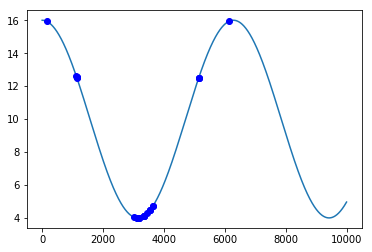

In [206]:
pop = np.random.randint(dyn_range,size=(pop_size,seq_len))
print("old pop")
print(pop)

for i in range(10):
    #print("NEW RUN")
    tournament_idx = tournamentCreator(pop)
    winners, global_sum,global_winners_scores = fitness(pop,tournament_idx)
    pop = (crossover(winners))
    #iter_prints()
    print("global winners")
    print (winners)
    dec_table = dec_creator(pop) 
    goal_points = np.apply_along_axis(goal_func,0,dec_table)
    
dec_table = dec_creator(pop) 
goal_points = np.apply_along_axis(goal_func,0,dec_table)

print("new pop")
print(pop)
print (winners)
plt.plot(goal_func_plot)
plt.plot(dec_table,goal_points,'bo')